<a href="https://www.kaggle.com/code/sonalranpise/sonalranpise-python-telecom-project?scriptVersionId=101023669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Comcast Telecommunication Complaints Project

**DESCRIPTION**

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

**Data Dictionary**

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

### Task - 1 : Import data into Python environment

In [2]:
# Loading Dataset
df_comcast_tel_complaints = pd.read_csv("../input/telecom-complaints-monitoring-system/Comcast_telecom_complaints_data.csv")

In [3]:
# Retrieves the top records of the dataframe
df_comcast_tel_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# detect the missing values in dataset
df_comcast_tel_complaints.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

INSIGHTS: From the above, There are no Nan values present in Dataset

In [5]:
# let's describe (statistical summary of the dataframe)
df_comcast_tel_complaints.describe(include = "all")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
# shape
print('The shape of the dataset is :', df_comcast_tel_complaints.shape)

The shape of the dataset is : (2224, 11)


In [7]:
# Drop the column Ticket and Time
df_comcast_tel_complaints = df_comcast_tel_complaints.drop(['Ticket #','Time'], axis=1)

In [8]:
# Retrieves the top records of the dataframe
df_comcast_tel_complaints.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
# shape
print('The shape of the dataset is :', df_comcast_tel_complaints.shape)

The shape of the dataset is : (2224, 9)


### Task - 2 : Provide the trend chart for the number of complaints at monthly and daily granularity levels

**a) Plotting monthly chart**

In [10]:
# convert string Date time into Python Date time object
df_comcast_tel_complaints['Date_month_year'] = df_comcast_tel_complaints['Date_month_year'].apply(pd.to_datetime)
# Setting 'Date_month_year' as index
df_comcast_tel_complaints = df_comcast_tel_complaints.set_index('Date_month_year')

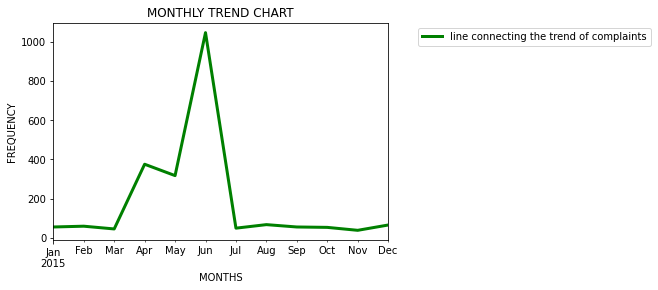

In [11]:
# plotting monthly chart
months = df_comcast_tel_complaints.groupby(pd.Grouper(freq="M")).size().plot(color = 'g',linewidth = 3,
                                                     label = "line connecting the trend of complaints")
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")
plt.legend(loc = "upper right", bbox_to_anchor= (1.8,1))
plt.grid(False)
plt.show()

INSIGHTS:- From the above trend chart, we can clearly see that complaints for the month of June 2015 are maximum

**b) Plotting daily chart**

In [12]:
#value_counts() function is getting a Series containing counts of unique values for Date column.
df_comcast_tel_complaints['Date'].value_counts(dropna=False).head(5)

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
Name: Date, dtype: int64

In [13]:
# sort the Date column
df_comcast_tel_complaints= df_comcast_tel_complaints.sort_values(by='Date')

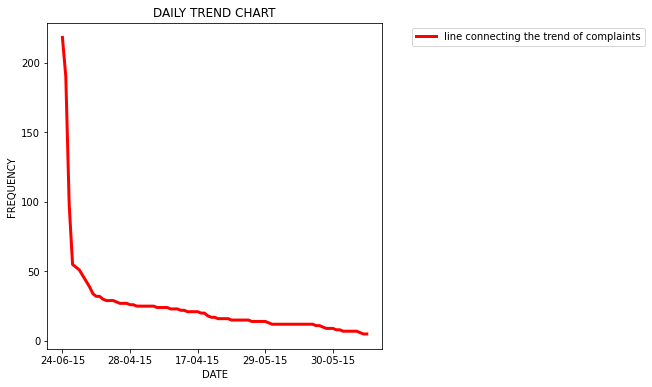

In [14]:
# Plotting daily chart
plt.figure(figsize=(6,6))
df_comcast_tel_complaints['Date'].value_counts().plot(color = 'r',linewidth = 3,
                               label = "line connecting the trend of complaints")
plt.xlabel("DATE")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")
plt.legend(loc = "upper right", bbox_to_anchor= (1.8,1))
plt.show()

INSIGHTS:- From the above trend chart, we can clearly see that complaints for the month of June 24th June 2015 are maximum

### Task - 3 : Provide a table with the frequency of complaint types

In [15]:
# View Top Complaints types
df_comcast_tel_complaints['Customer Complaint'].value_counts(dropna=False).head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Comcast/Xfinity              8
Name: Customer Complaint, dtype: int64

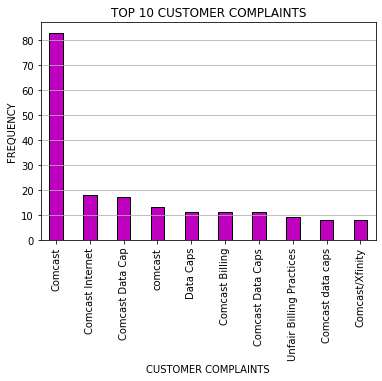

In [16]:
# Plot Bar Graph of Customer Complaints
df_comcast_tel_complaints['Customer Complaint'].value_counts(dropna=False).head(10).plot.bar(color ='m', width=0.4, 
                                                                                             edgecolor ='k')
plt.xlabel("CUSTOMER COMPLAINTS") 
plt.ylabel("FREQUENCY")
plt.title("TOP 10 CUSTOMER COMPLAINTS")
plt.grid(True, axis= 'y')
plt.show()

INSIGHTS:- From the above bar chart, we can clearly see that complaints for the "Comcast" are maximum. i.e 83

### Task - 4 : Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [17]:
# Internet Related Complaints
internet_issues1 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("network")].count()
internet_issues2 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("speed")].count()
internet_issues3 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("data")].count()
internet_issues4 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("internet")].count()

In [18]:
# Billing Realted Complaints
billing_issues1 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("bill")].count()
billing_issues2 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("billing")].count()
billing_issues3 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("charges")].count()

In [19]:
# Service Realted Complaints
service_issues1 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("service")].count()
service_issues2 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("customer")].count()
service_issues3 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("telecom")].count()
service_issues4 = df_comcast_tel_complaints[df_comcast_tel_complaints['Customer Complaint'].str.contains("complaint")].count()

In [20]:
# Total_internet_issues 
total_internet_issues = internet_issues1 + internet_issues2 + internet_issues3 + internet_issues4
print(total_internet_issues)

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [21]:
# Total_billing_issues
total_billing_issues = billing_issues1 + billing_issues2 + billing_issues3
print(total_billing_issues)

Customer Complaint             353
Date                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [22]:
# Total_service_issues
total_service_issues = service_issues1 + service_issues2 + service_issues3 + service_issues4 
print(total_service_issues)

Customer Complaint             390
Date                           390
Received Via                   390
City                           390
State                          390
Zip code                       390
Status                         390
Filing on Behalf of Someone    390
dtype: int64


In [23]:
# Total_other_issues
other_issues = 2224-(total_internet_issues + total_billing_issues + total_service_issues)
print(other_issues)

Customer Complaint             1107
Date                           1107
Received Via                   1107
City                           1107
State                          1107
Zip code                       1107
Status                         1107
Filing on Behalf of Someone    1107
dtype: int64


INSIGHTS:- From the above analysis we can see that the other issues are maximum.

### Task - 5 : Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [24]:
print ("Total no of unique values present in the data", df_comcast_tel_complaints.Status.nunique())
print("=============================================================================================")
print ("Total no of categories values present in the data", df_comcast_tel_complaints.Status.unique())

Total no of unique values present in the data 4
Total no of categories values present in the data ['Closed' 'Open' 'Solved' 'Pending']


In [25]:
# New categorical variable with value as Open and Closed
df_comcast_tel_complaints["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending"
                                          else "Closed" 
                                          for Status in df_comcast_tel_complaints["Status"]]
df_comcast_tel_complaints = df_comcast_tel_complaints.drop(['Status'], axis=1)
df_comcast_tel_complaints

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,NewStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,Open
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,Open
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,Open


In [26]:
df_comcast_tel_complaints.NewStatus.unique()

array(['Closed', 'Open'], dtype=object)

### Task - 6 : Provide state wise status of complaints in a stacked bar chart.

In [27]:
# state wise status of complaints
Status_complaints = df_comcast_tel_complaints.groupby(["State","NewStatus"]).size().unstack()
print(Status_complaints)

NewStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

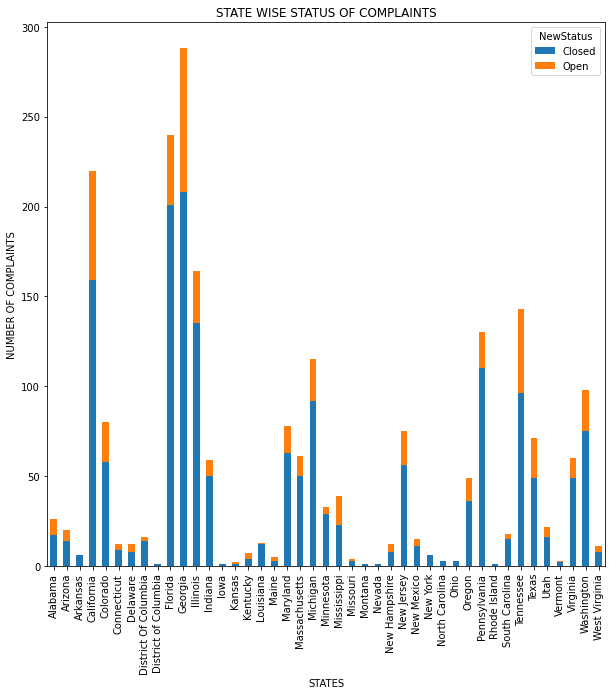

In [28]:
# state wise status of complaints in a stacked bar chart
Status_complaints.plot.bar(figsize=(10,10), stacked=True)
plt.xlabel("STATES")
plt.ylabel("NUMBER OF COMPLAINTS")
plt.title("STATE WISE STATUS OF COMPLAINTS")
plt.show()

INSIGHTS:- From the above chart, we can clearly see that Georgia has maximum complaints.

### Task - 7 : Which state has the maximum complaints

In [29]:
df_comcast_tel_complaints.groupby(["State"]).size().sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

INSIGHTS:- From the above table, we can clearly see that Georgia has maximum complaints.

### Task - 8 : state which has the highest percentage of unresolved complaints

In [30]:
print(df_comcast_tel_complaints['NewStatus'].value_counts())

Closed    1707
Open       517
Name: NewStatus, dtype: int64


In [31]:
unresolved_complaints = df_comcast_tel_complaints.groupby(["State",'NewStatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_complaints['Unresolved'] = unresolved_complaints['Open']/unresolved_complaints['Open'].sum()*100
print(unresolved_complaints)

NewStatus             Closed  Open  Unresolved
State                                         
Georgia                208.0  80.0   15.473888
California             159.0  61.0   11.798839
Tennessee               96.0  47.0    9.090909
Florida                201.0  39.0    7.543520
Illinois               135.0  29.0    5.609284
Washington              75.0  23.0    4.448743
Michigan                92.0  23.0    4.448743
Colorado                58.0  22.0    4.255319
Texas                   49.0  22.0    4.255319
Pennsylvania           110.0  20.0    3.868472
New Jersey              56.0  19.0    3.675048
Mississippi             23.0  16.0    3.094778
Maryland                63.0  15.0    2.901354
Oregon                  36.0  13.0    2.514507
Virginia                49.0  11.0    2.127660
Massachusetts           50.0  11.0    2.127660
Alabama                 17.0   9.0    1.740812
Indiana                 50.0   9.0    1.740812
Utah                    16.0   6.0    1.160542
Arizona      

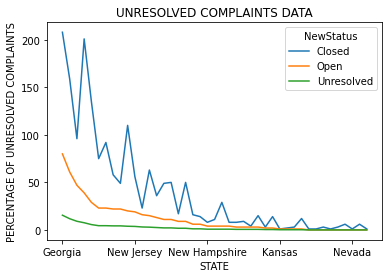

In [32]:
unresolved_complaints.plot()
plt.xlabel("STATE")
plt.ylabel("PERCENTAGE OF UNRESOLVED COMPLAINTS")
plt.title("UNRESOLVED COMPLAINTS DATA")
plt.show()

INSIGHTS:- From the table generated above we can see that Georgia has maximum unresolved complaints i.e. 80.

### Task - 9 : Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [33]:
resolved_complaints = df_comcast_tel_complaints.groupby(['Received Via','NewStatus']).size().unstack().fillna(0)
resolved_complaints['resolved'] = resolved_complaints['Closed']/resolved_complaints['Closed'].sum()*100
resolved_complaints['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

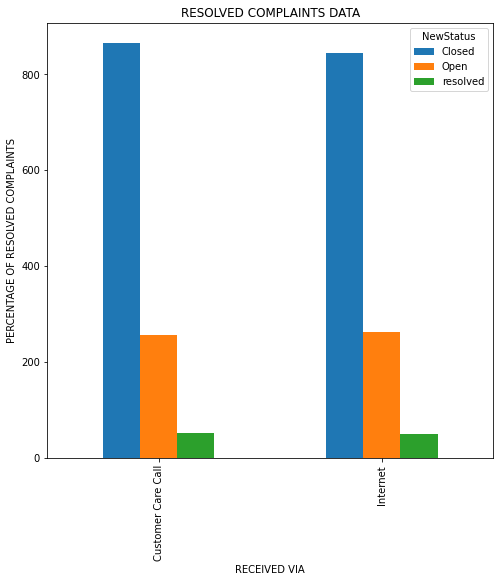

In [34]:
resolved_complaints.plot(kind="bar", figsize=(8,8))
plt.xlabel("RECEIVED VIA")
plt.ylabel("PERCENTAGE OF RESOLVED COMPLAINTS")
plt.title("RESOLVED COMPLAINTS DATA")
plt.show()

INSIGHTS:- From the above pie chart we can clearly see that there are total 50.61% Complaints resolved for Customer Care Call and 49.39% for received via internet.